In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from utils import *

path_data = '/Users/dariozappala/Library/CloudStorage/Dropbox/università/RTD-A/progetti/dati/Crunchbase/'
path_images = './immagini/'

# Lettura

In [2]:
%%time
df_organizations = pd.read_csv(path_data + 'organizations.csv')
clean_organizations(df_organizations)

CPU times: user 24 s, sys: 4.68 s, total: 28.6 s
Wall time: 30 s


# Esplorazione

In [3]:
print(df_organizations.shape, '\n')

# Informazioni sulle date
print('founded_on:')
print(df_organizations['founded_on'].min())
print(df_organizations['founded_on'].max())
print('\nclosed_on:')
print(df_organizations['closed_on'].min())
print(df_organizations['closed_on'].max())
print('\nRows:', df_organizations.shape[0])
print("'founded_on' < '1900-01-01':\t", (df_organizations['founded_on'] < '1900-01-01').sum())
print("'closed_on' < '1900-01-01':\t", (df_organizations['closed_on'] < '1900-01-01').sum())

(3090736, 42) 

founded_on:
1678-01-01 00:00:00
2023-09-10 00:00:00

closed_on:
1700-01-01 00:00:00
2023-09-06 00:00:00

Rows: 3090736
'founded_on' < '1900-01-01':	 36367
'closed_on' < '1900-01-01':	 3


In [4]:
df_organizations.loc[
    df_organizations['closed_on'] < '1900-01-01',
    ['uuid', 'name', 'legal_name', 'country_code', 'founded_on', 'closed_on']
]

,uuid,name,legal_name,country_code,founded_on,closed_on
1070024,73886df6-7546-4dc1-9d88-d1925a6c727e,meg za impex pty ltd,Gill Lenord,NaN,NaT,1700-01-01
1125952,716addb2-ee19-4f10-bcf0-fe9437cfcf14,lfwefwf,ssccsasc,NaN,1700-01-01,1700-01-01
2103167,21e91bce-cb29-4530-aeba-2deba9152050,Ventcroft,Ventcroft Ltd.,GBR,NaT,1891-01-01


In [5]:
df_organizations.iloc[:5, 0:14]

,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,legal_name,roles,domain,homepage_url,country_code,state_code
0,e1393508-30ea-8a36-3f96-dd3226033abd,Wetpaint,organization,wetpaint,https://www.crunchbase.com/organization/wetpaint,184663.0,2007-05-25 13:51:27,2023-08-01 00:01:37,NaN,company,wetpaint.com,http://www.wetpaint.com/,USA,NY
1,bf4d7b0e-b34d-2fd8-d292-6049c4f7efc7,Zoho,organization,zoho,https://www.crunchbase.com/organization/zoho,13591.0,2007-05-26 02:30:28,2023-06-19 08:30:22,Zoho Corporation Pvt. Ltd.,"investor,company",zoho.com,https://www.zoho.com,USA,CA
2,5f2b40b8-d1b3-d323-d81a-b7a8e89553d0,Digg,organization,digg,https://www.crunchbase.com/organization/digg,29463.0,2007-05-26 03:03:23,2018-12-10 10:09:14,"Digg Holdings, LLC",company,digg.com,http://www.digg.com,USA,NY
3,f4d5ab44-058b-298b-ea81-380e6e9a8eec,Omidyar Network,organization,omidyar-network,https://www.crunchbase.com/organization/omidya...,60637.0,2007-05-26 03:21:34,2023-08-30 02:27:06,NaN,"investor,company",omidyar.com,http://www.omidyar.com,USA,CA
4,df662812-7f97-0b43-9d3e-12f64f504fbb,Meta,organization,facebook,https://www.crunchbase.com/organization/facebook,148.0,2007-05-26 04:22:15,2023-05-04 18:27:53,"Meta Platforms, Inc.","investor,company",meta.com,https://meta.com,USA,CA


In [6]:
df_organizations.iloc[:5, 14:28]

,region,city,address,postal_code,status,short_description,category_list,category_groups_list,num_funding_rounds,total_funding_usd,total_funding,total_funding_currency_code,founded_on,last_funding_on
0,New York,New York,902 Broadway 11th Floor New,10010,acquired,Wetpaint offers an online social publishing pl...,"Publishing,Social Media,Social Media Management","Content and Publishing,Internet Services,Media...",3.0,3.975000e+07,3.975000e+07,USD,2005-06-01,2008-05-19
1,California,Pleasanton,NaN,NaN,operating,"Zoho offers a suite of business, collaboration...","Cloud Computing,Collaboration,Developer Tools,...","Administrative Services,Apps,Information Techn...",NaN,NaN,NaN,NaN,1996-03-17,NaN
2,New York,New York,NaN,NaN,acquired,Digg Inc. operates a website that enables its ...,"Internet,Social Media,Social Network","Internet Services,Media and Entertainment",6.0,4.900000e+07,4.900000e+07,USD,2004-10-11,2016-09-13
3,California,Redwood City,1991 Broadway Suite 200,94063,operating,Omidyar Network is an investment firm.,"Enterprise Software,Financial Services,Venture...","Financial Services,Lending and Investments,Sof...",NaN,NaN,NaN,NaN,2004-01-01,NaN
4,California,Menlo Park,1 Hacker Way,94025,ipo,Meta is a social technology company that enabl...,"Augmented Reality,Social Media,Social Network,...","Hardware,Internet Services,Media and Entertain...",16.0,2.462282e+10,2.462282e+10,USD,2004-02-04,2022-08-04


In [7]:
df_organizations.iloc[:5, 28:42]

,closed_on,employee_count,email,phone,facebook_url,linkedin_url,twitter_url,logo_url,alias1,alias2,alias3,primary_role,num_exits,area
0,NaT,51-100,info@wetpaint.com,206-859-6300,https://www.facebook.com/Wetpaint,https://www.linkedin.com/company/recruitment-c...,https://twitter.com/wetpainttv,https://images.crunchbase.com/image/upload/t_c...,NaN,NaN,NaN,company,NaN,USA
1,NaT,10000+,sales@zohocorp.com,044 - 67447070,http://www.facebook.com/zoho,https://www.linkedin.com/company/zoho,http://twitter.com/zoho,https://images.crunchbase.com/image/upload/t_c...,NaN,NaN,NaN,company,2.0,USA
2,NaT,51-100,feedback@digg.com,877-342-7222,http://www.facebook.com/digg,http://www.linkedin.com/company/digg,http://twitter.com/digg,https://images.crunchbase.com/image/upload/t_c...,NaN,NaN,NaN,company,NaN,USA
3,NaT,101-250,info@omidyar.com,650.482.2500,http://www.facebook.com/OmidyarNetwork,http://www.linkedin.com/company/22806,http://twitter.com/OmidyarNetwork,https://images.crunchbase.com/image/upload/t_c...,NaN,NaN,NaN,investor,59.0,USA
4,NaT,10000+,NaN,NaN,https://www.facebook.com/Meta,https://www.linkedin.com/company/meta,https://www.twitter.com/Meta,https://images.crunchbase.com/image/upload/t_c...,Facebook,"Facebook, Inc.",NaN,company,1.0,USA


In [8]:
df_organizations['type'].value_counts()

type
organization    3090736
Name: count, dtype: int64

In [9]:
df_organizations['primary_role'].value_counts()

primary_role
company     2978252
investor      88165
school        24319
Name: count, dtype: int64

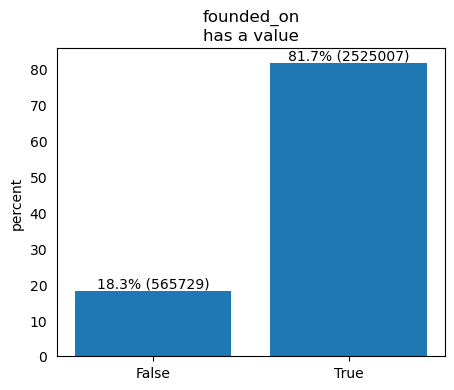

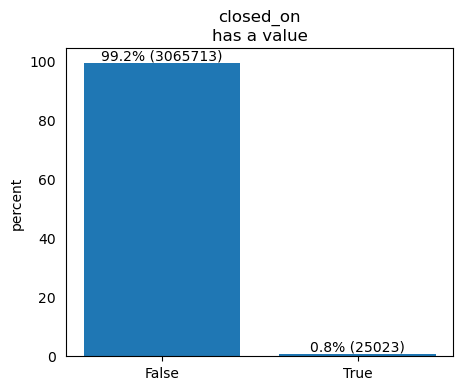

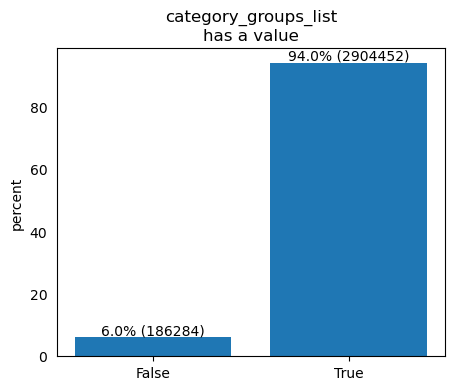

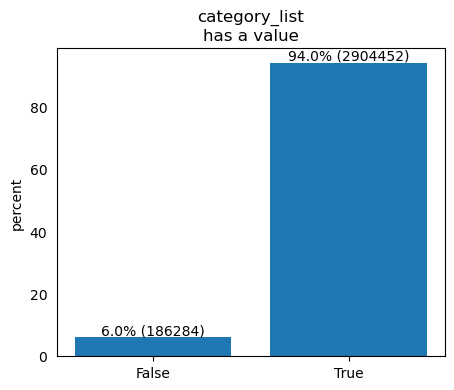

In [10]:
for col in ['founded_on', 'closed_on', 'category_groups_list', 'category_list']:
    values, counts = np.unique(~df_organizations[col].isna(), return_counts = True)
    percents = 100 * counts / counts.sum()
    Delta_y = percents.max() * 1/100

    fig, ax = plt.subplots(figsize = (5, 4))
    ax.bar(x = range(len(values)), height = percents)
    for tick in ax.yaxis.get_major_ticks():
        tick.tick1line.set_visible(False)
        tick.tick2line.set_visible(False)
    ax.set_xticks(range(len(values)), values)
    for i in range(len(values)):
        plt.text(i, percents[i] + Delta_y, f'{percents[i]:.1f}% ({counts[i]})', ha = 'center')
    ax.set_ylabel('percent')
    ax.set_title(col + '\nhas a value')
    plt.savefig(path_images + 'has_value.png', bbox_inches = 'tight')
    plt.show()

## Settori di mercato

In [11]:
%%time

rows_sel = (~df_organizations['category_groups_list'].isna()) & (df_organizations['founded_on'] > '1970-01-01')
print(f'Selected organizations: {rows_sel.sum()} among {rows_sel.shape[0]}.')
ser_generic_sectors_n = df_organizations.loc[rows_sel, 'category_groups_list'].str.split(',').explode().dropna().value_counts()
print(f'N. of generic sectors: {ser_generic_sectors_n.shape[0]}\n')
display(ser_generic_sectors_n)

Selected organizations: 2159883 among 3090736.
N. of generic sectors: 47



category_groups_list
Software                            492612
Professional Services               391410
Information Technology              351407
Other                               328191
Sales and Marketing                 279285
Media and Entertainment             268862
Commerce and Shopping               268021
Manufacturing                       263331
Financial Services                  260425
Health Care                         246337
Internet Services                   243574
Real Estate                         226309
Design                              205463
Hardware                            200460
Science and Engineering             190710
Advertising                         134948
Transportation                      132120
Education                           131754
Data and Analytics                  119795
Administrative Services             117859
Community and Lifestyle              95254
Consumer Electronics                 86102
Food and Beverage                

CPU times: user 2.03 s, sys: 158 ms, total: 2.19 s
Wall time: 2.2 s


In [12]:
%%time

rows_sel = (~df_organizations['category_list'].isna()) & (df_organizations['founded_on'] > '1970-01-01')
print(f'Selected organizations: {rows_sel.sum()} among {rows_sel.shape[0]}.')
ser_specific_sectors_n = df_organizations.loc[rows_sel, 'category_list'].str.split(',').explode().dropna().value_counts()
print(f'N. of specific sectors: {ser_specific_sectors_n.shape[0]}\n')
display(ser_specific_sectors_n)

Selected organizations: 2159883 among 3090736.
N. of specific sectors: 743



category_list
Software                  281558
Information Technology    257105
Consulting                230034
Manufacturing             207698
Health Care               184312
                           ...  
Roku                           7
Darknet                        7
Generation Y                   7
RISC                           6
Ultimate Frisbee               4
Name: count, Length: 743, dtype: int64

CPU times: user 2.23 s, sys: 181 ms, total: 2.41 s
Wall time: 2.46 s


# Unicità delle compagnie

In [3]:
ser_uuid = df_organizations.value_counts('uuid')
ser_uuid

uuid
000005f0-ac09-4c67-9086-92180e11b083    1
aaabc21f-bd83-4478-8e0d-f00e48c9ad21    1
aaab8fdf-eca9-d3cc-510b-d2cd9efcd261    1
aaab9c5b-ea94-47b5-9b50-d253b4d15269    1
aaab9e3e-f7c9-4f06-9fe8-88740275aff9    1
                                       ..
553fba12-3bfa-4694-b36e-8d4596a660b8    1
553fd3bd-2936-44af-a38f-20797b6f7f5c    1
553fd452-5de7-437a-8c93-b92a1a961401    1
553fe35c-d589-6bf6-7af7-8edf25bfeda9    1
fffff91b-f695-4301-90bd-3a402b4991a2    1
Name: count, Length: 3090736, dtype: int64

In [4]:
ser_uuid.max()

1